## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [39]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import dtreeviz
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [42]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [44]:
#removendo a coluna com varáveis do tipo string para realizar os métodos com skleanr
X = df.drop(columns='ocean_proximity')


In [46]:
print(X.shape)
X.isna().sum()

(20640, 9)


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [48]:
X = X.drop(columns=['total_bedrooms','median_house_value'])
y = df['median_house_value']


In [50]:
print(X.shape)
print(y.shape)

(20640, 7)
(20640,)


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print(X_train.shape)
print(y_train.shape)


(15480, 7)
(15480,)


In [54]:
dt_reg = DecisionTreeRegressor(max_depth=5, random_state=0)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [56]:
print('Erro Quadrático Médio (MSE):', 
      round(mean_squared_error(y_true=y_train, 
                               y_pred=dt_reg.predict(X_train)), 
            2))

print('Coeficiente de determinação (R-quadrado):', 
      round(dt_reg.score(X=X_train, 
                         y=y_train), 
            2))

Erro Quadrático Médio (MSE): 5217947203.62
Coeficiente de determinação (R-quadrado): 0.61


In [58]:
pd.concat(objs=[y_train.reset_index(drop=True), 
                pd.DataFrame(data=dt_reg.predict(X_train), 
                             columns=['Valor predito do imóvel na base de treinamento']
                            )
               ], axis=1)

,median_house_value,Valor predito do imóvel na base de treinamento
0,381300.0,394106.058824
1,329300.0,295660.805380
2,185400.0,219109.521637
3,500001.0,330592.443946
4,97500.0,104179.879791
...,...,...
15475,144600.0,143587.000000
15476,159400.0,104179.879791
15477,289300.0,219109.521637
15478,484600.0,273148.915966


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [61]:
path = dt_reg.cost_complexity_pruning_path(X=X_train, y=y_train)
path

{'ccp_alphas': array([0.00000000e+00, 7.68799979e+06, 8.83520859e+06, 1.19359885e+07,
        1.23642228e+07, 1.62148079e+07, 1.65661789e+07, 2.47646798e+07,
        2.71188689e+07, 2.85327408e+07, 2.94806831e+07, 3.31269344e+07,
        3.33259585e+07, 3.35907681e+07, 4.01371951e+07, 4.12214225e+07,
        5.51974249e+07, 8.37754021e+07, 1.19386702e+08, 1.28951323e+08,
        1.31206914e+08, 1.33450234e+08, 1.52949231e+08, 1.55063386e+08,
        1.68603125e+08, 2.62298741e+08, 7.61940255e+08, 1.07809696e+09,
        4.20578337e+09]),
 'impurities': array([5.21794720e+09, 5.22563520e+09, 5.23447041e+09, 5.24640640e+09,
        5.25877062e+09, 5.27498543e+09, 5.29155161e+09, 5.31631629e+09,
        5.37055403e+09, 5.39908677e+09, 5.42856745e+09, 5.46169439e+09,
        5.49502034e+09, 5.52861111e+09, 5.56874831e+09, 5.60996973e+09,
        5.66516716e+09, 5.74894256e+09, 5.86832926e+09, 5.99728058e+09,
        6.25969441e+09, 6.39314464e+09, 6.54609387e+09, 6.70115726e+09,
        7.

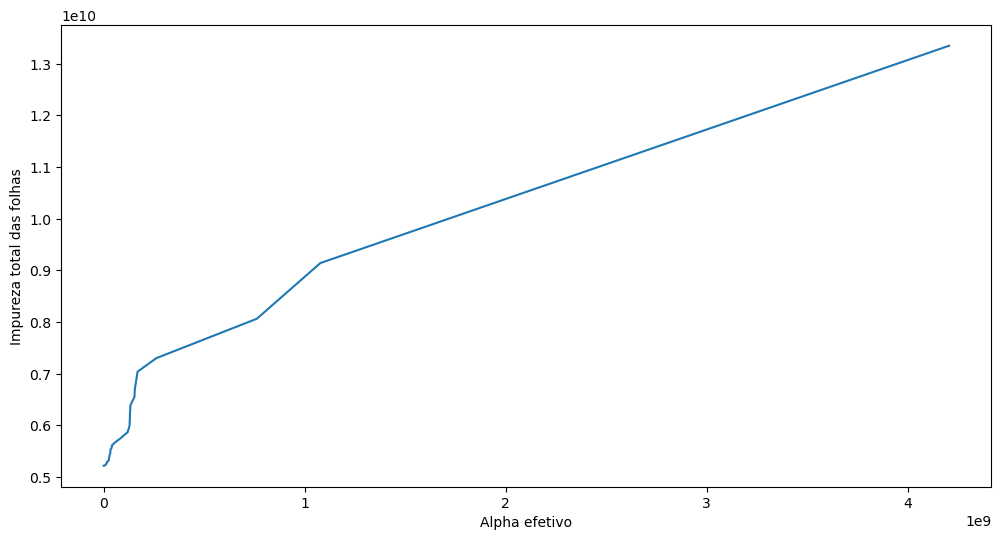

In [63]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(12,6))
plt.plot(ccp_alphas, impurities)

plt.xlabel(xlabel='Alpha efetivo')
plt.ylabel(ylabel='Impureza total das folhas')

plt.show()

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [66]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=123, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [67]:
print(clfs)

[DecisionTreeRegressor(random_state=123), DecisionTreeRegressor(ccp_alpha=7687999.794245824, random_state=123), DecisionTreeRegressor(ccp_alpha=8835208.589203805, random_state=123), DecisionTreeRegressor(ccp_alpha=11935988.540054683, random_state=123), DecisionTreeRegressor(ccp_alpha=12364222.84279333, random_state=123), DecisionTreeRegressor(ccp_alpha=16214807.875004746, random_state=123), DecisionTreeRegressor(ccp_alpha=16566178.86183387, random_state=123), DecisionTreeRegressor(ccp_alpha=24764679.798959166, random_state=123), DecisionTreeRegressor(ccp_alpha=27118868.909254625, random_state=123), DecisionTreeRegressor(ccp_alpha=28532740.797754675, random_state=123), DecisionTreeRegressor(ccp_alpha=29480683.095321476, random_state=123), DecisionTreeRegressor(ccp_alpha=33126934.43275544, random_state=123), DecisionTreeRegressor(ccp_alpha=33325958.51561284, random_state=123), DecisionTreeRegressor(ccp_alpha=33590768.05063766, random_state=123), DecisionTreeRegressor(ccp_alpha=40137195.1

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [69]:
# Calculo do MSE do banco de dados de treino e de teste.
train_MSE = [mean_squared_error(y_train, clf.predict(X_train)) for clf in clfs]
test_MSE  = [mean_squared_error(y_test , clf.predict(X_test )) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

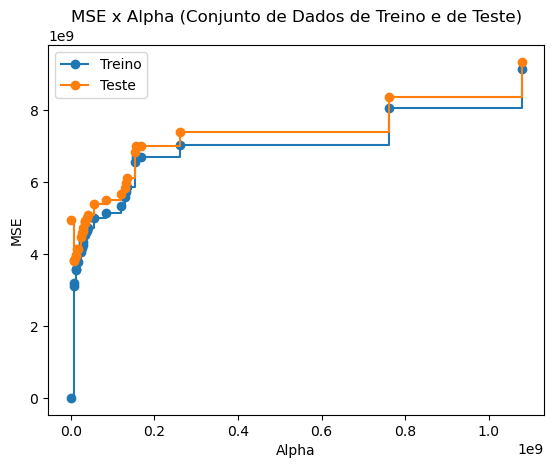

In [71]:

# Criando subplots() para inserir o gráfico e definindo nomes para os xlabel, ylabel e título.
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x Alpha (Conjunto de Dados de Treino e de Teste)")

# Plotando o primeiro Gráfico.
ax.plot(ccp_alphas[:-1], # Inserindo ccp_alphas, desconsiderando o mais profundo.
        train_MSE[:-1], # Inserindo train_MSE, desconsiderando o mais profundo.
        marker='o', # Adicionando um ponto para cada dado do conjunto de dados.
        label='Treino', # Label Treino.
        drawstyle="steps-post") # Configurando para gráfico escada.

# Plotando o segundo Gráfico.
ax.plot(ccp_alphas[:-1], # Inserindo ccp_alphas, desconsiderando o mais profundo.
        test_MSE[:-1], # Inserindo train_MSE, desconsiderando o mais profundo.
        marker='o', # Adicionando um ponto para cada dado do conjunto de dados.
        label='Teste', # Label Teste.
        drawstyle="steps-post") # Configurando para gráfico escada.

ax.legend() # Adicionando legenda ('Treino' e 'Teste')
plt.show() # Exibir gráfico.

In [89]:
df_ccp = pd.DataFrame(data={'ccp_alphas':ccp_alphas, 
                            'train_scores':train_MSE, 
                            'test_scores':test_MSE})

df_ccp.sort_values(by=['test_scores', 'train_scores'])

,ccp_alphas,train_scores,test_scores
2,8.835209e+06,3.194923e+09,3.814056e+09
1,7.688000e+06,3.103329e+09,3.844456e+09
3,1.193599e+07,3.563168e+09,3.947604e+09
4,1.236422e+07,3.575467e+09,3.960089e+09
5,1.621481e+07,3.787977e+09,4.134080e+09
6,1.656618e+07,3.787977e+09,4.134080e+09
7,2.476468e+07,4.069545e+09,4.478440e+09
8,2.711887e+07,4.172934e+09,4.579618e+09
9,2.853274e+07,4.255586e+09,4.635870e+09
10,2.948068e+07,4.342221e+09,4.713683e+09


In [91]:
ccp_alpha_min = df_ccp.sort_values(by=['test_scores', 'train_scores']).iloc[0,0]
ccp_alpha_min

8835208.589203805

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [93]:
final_tree = DecisionTreeRegressor(ccp_alpha=ccp_alpha_min, random_state=123)
final_tree.fit(X_train, y_train)

print(f'Profundidade: {final_tree.tree_.max_depth}')
print(f'R-quadrado na base de testes: {final_tree.score(X_test, y_test):.2f}')
print(f'MSE na base de testes: {mean_squared_error(y_test, final_tree.predict(X_test)):.2f}')

Profundidade: 14
R-quadrado na base de testes: 0.71
MSE na base de testes: 3814056127.53


### 7. Visualize esta árvore.

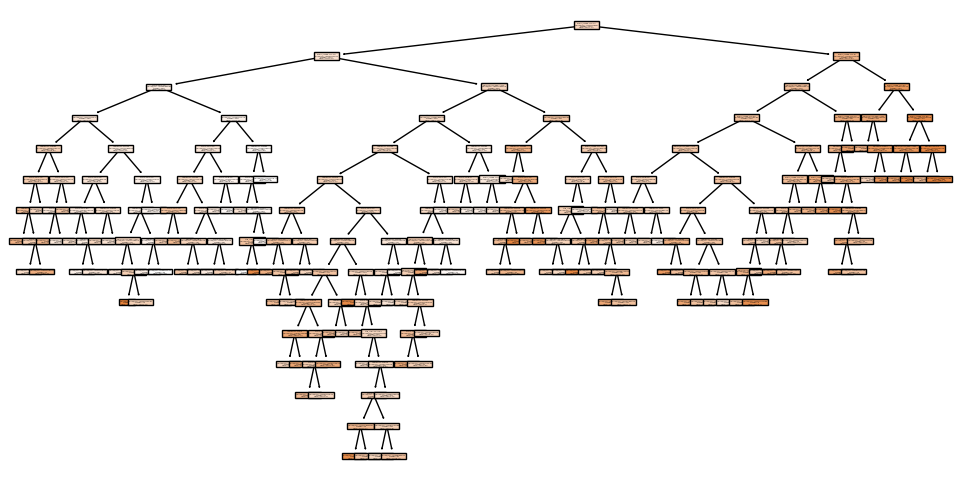

In [95]:
plt.rc('figure', figsize=(12,6))

tree.plot_tree(decision_tree=final_tree, 
               feature_names=X.columns, 
               filled=True);